#      DATA SCIENCE PROJECT ON BLOOD DONATION PREDICTION 

**TEAM CODE:** PTID-CDS-SEP-22-1377

**PROJECT CODE:** PRCP-1011-BloodDonaPred

**DATA COLLECTION:** DATA PROVIDED BY DATAMITES FOR CAPSTONE PROJECT

## Import Necessary Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

# to avoid warnings
import warnings
warnings.filterwarnings("ignore")

## Loading Data

In [2]:
data = pd.read_csv("Warm_Up_Predict_Blood_Donations_-_Traning_Data.csv")

In [3]:
data.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


## Domain Analysis

**1.Unnamed:0 :** 
  * This column represents the donor's unique ID.


**2.Months since Last Donation :** 
  * This is the number of months since this donor’s most recent donation.


**3.Number of Donations :** 
  * This is the total number of donations that the donor has made.


**4.Total Volume Donated (c.c.) :** 
  * This is the total amount of blood that the donor has donated in cubic centimetres.


**5.Months since First Donation :** 
  * This is the number of months since the donor’s first donation.


**6.Made Donation in March 2007 :** 
  * A binary variable representing whether he/she donated blood in March 2007 (1 stands for                                         donating blood; 0 stands for not donating blood)

## Basic Checks

In [4]:
data.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [5]:
data.tail()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
571,698,23,1,250,23,0
572,433,16,3,750,86,0
573,360,21,2,500,52,0
574,541,39,1,250,39,0
575,74,72,1,250,72,0


In [6]:
data.shape

(576, 6)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Unnamed: 0                   576 non-null    int64
 1   Months since Last Donation   576 non-null    int64
 2   Number of Donations          576 non-null    int64
 3   Total Volume Donated (c.c.)  576 non-null    int64
 4   Months since First Donation  576 non-null    int64
 5   Made Donation in March 2007  576 non-null    int64
dtypes: int64(6)
memory usage: 27.1 KB


In [8]:
#Renaming certain columns

data.rename({'Unnamed: 0':'Donor_ID',
             'Months since Last Donation':'Months_LastDonation',
             'Number of Donations':'Total_Donations',
             'Total Volume Donated (c.c.)':'Total_volumeDonation',
            'Months since First Donation':'Months_FirstDonation',
            'Made Donation in March 2007':'target_March2007Donation'},axis=1,inplace=True)

In [9]:
data.head(10)

,Donor_ID,Months_LastDonation,Total_Donations,Total_volumeDonation,Months_FirstDonation,target_March2007Donation
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0
5,335,4,4,1000,4,0
6,47,2,7,1750,14,1
7,164,1,12,3000,35,0
8,736,5,46,11500,98,1
9,436,0,3,750,4,0


### Statistical Measures Of Data

In [10]:
data.describe()

,Donor_ID,Months_LastDonation,Total_Donations,Total_volumeDonation,Months_FirstDonation,target_March2007Donation
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,374.034722,9.439236,5.427083,1356.770833,34.050347,0.239583
std,216.947773,8.175454,5.740010,1435.002556,24.227672,0.427200
min,0.000000,0.000000,1.000000,250.000000,2.000000,0.000000
25%,183.750000,2.000000,2.000000,500.000000,16.000000,0.000000
50%,375.500000,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,562.500000,14.000000,7.000000,1750.000000,49.250000,0.000000
max,747.000000,74.000000,50.000000,12500.000000,98.000000,1.000000


## Explotary Data Analysis

### Univariate analysis

In [11]:
import sweetviz as sv 
my_report = sv.analyze(data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


##### SWEETVIZ_REPORT :

##### Observation :

* 1.Months_LastDonation ranges from 0 to 74.
* 2.Two values more than 70
* 3.Total donation ranges from 1 to 50.
* 4.There is 4 values more than 40 in total donation
* 5.Total donation and total volume donation  has high correlation.corr=1.
* 6.postive class is 24% and negative class is 76%.
* 7.More than 420 obsevations are lie in negative class. 
* 8.Highly imbalanced data set.

### Bivariate Analysis

### Analysis On Numerical Features With Respect To Target Veriable (target_March2007Donation)

In [12]:
data_1 = data[['Months_LastDonation','Total_Donations','Total_volumeDonation','Months_FirstDonation']]

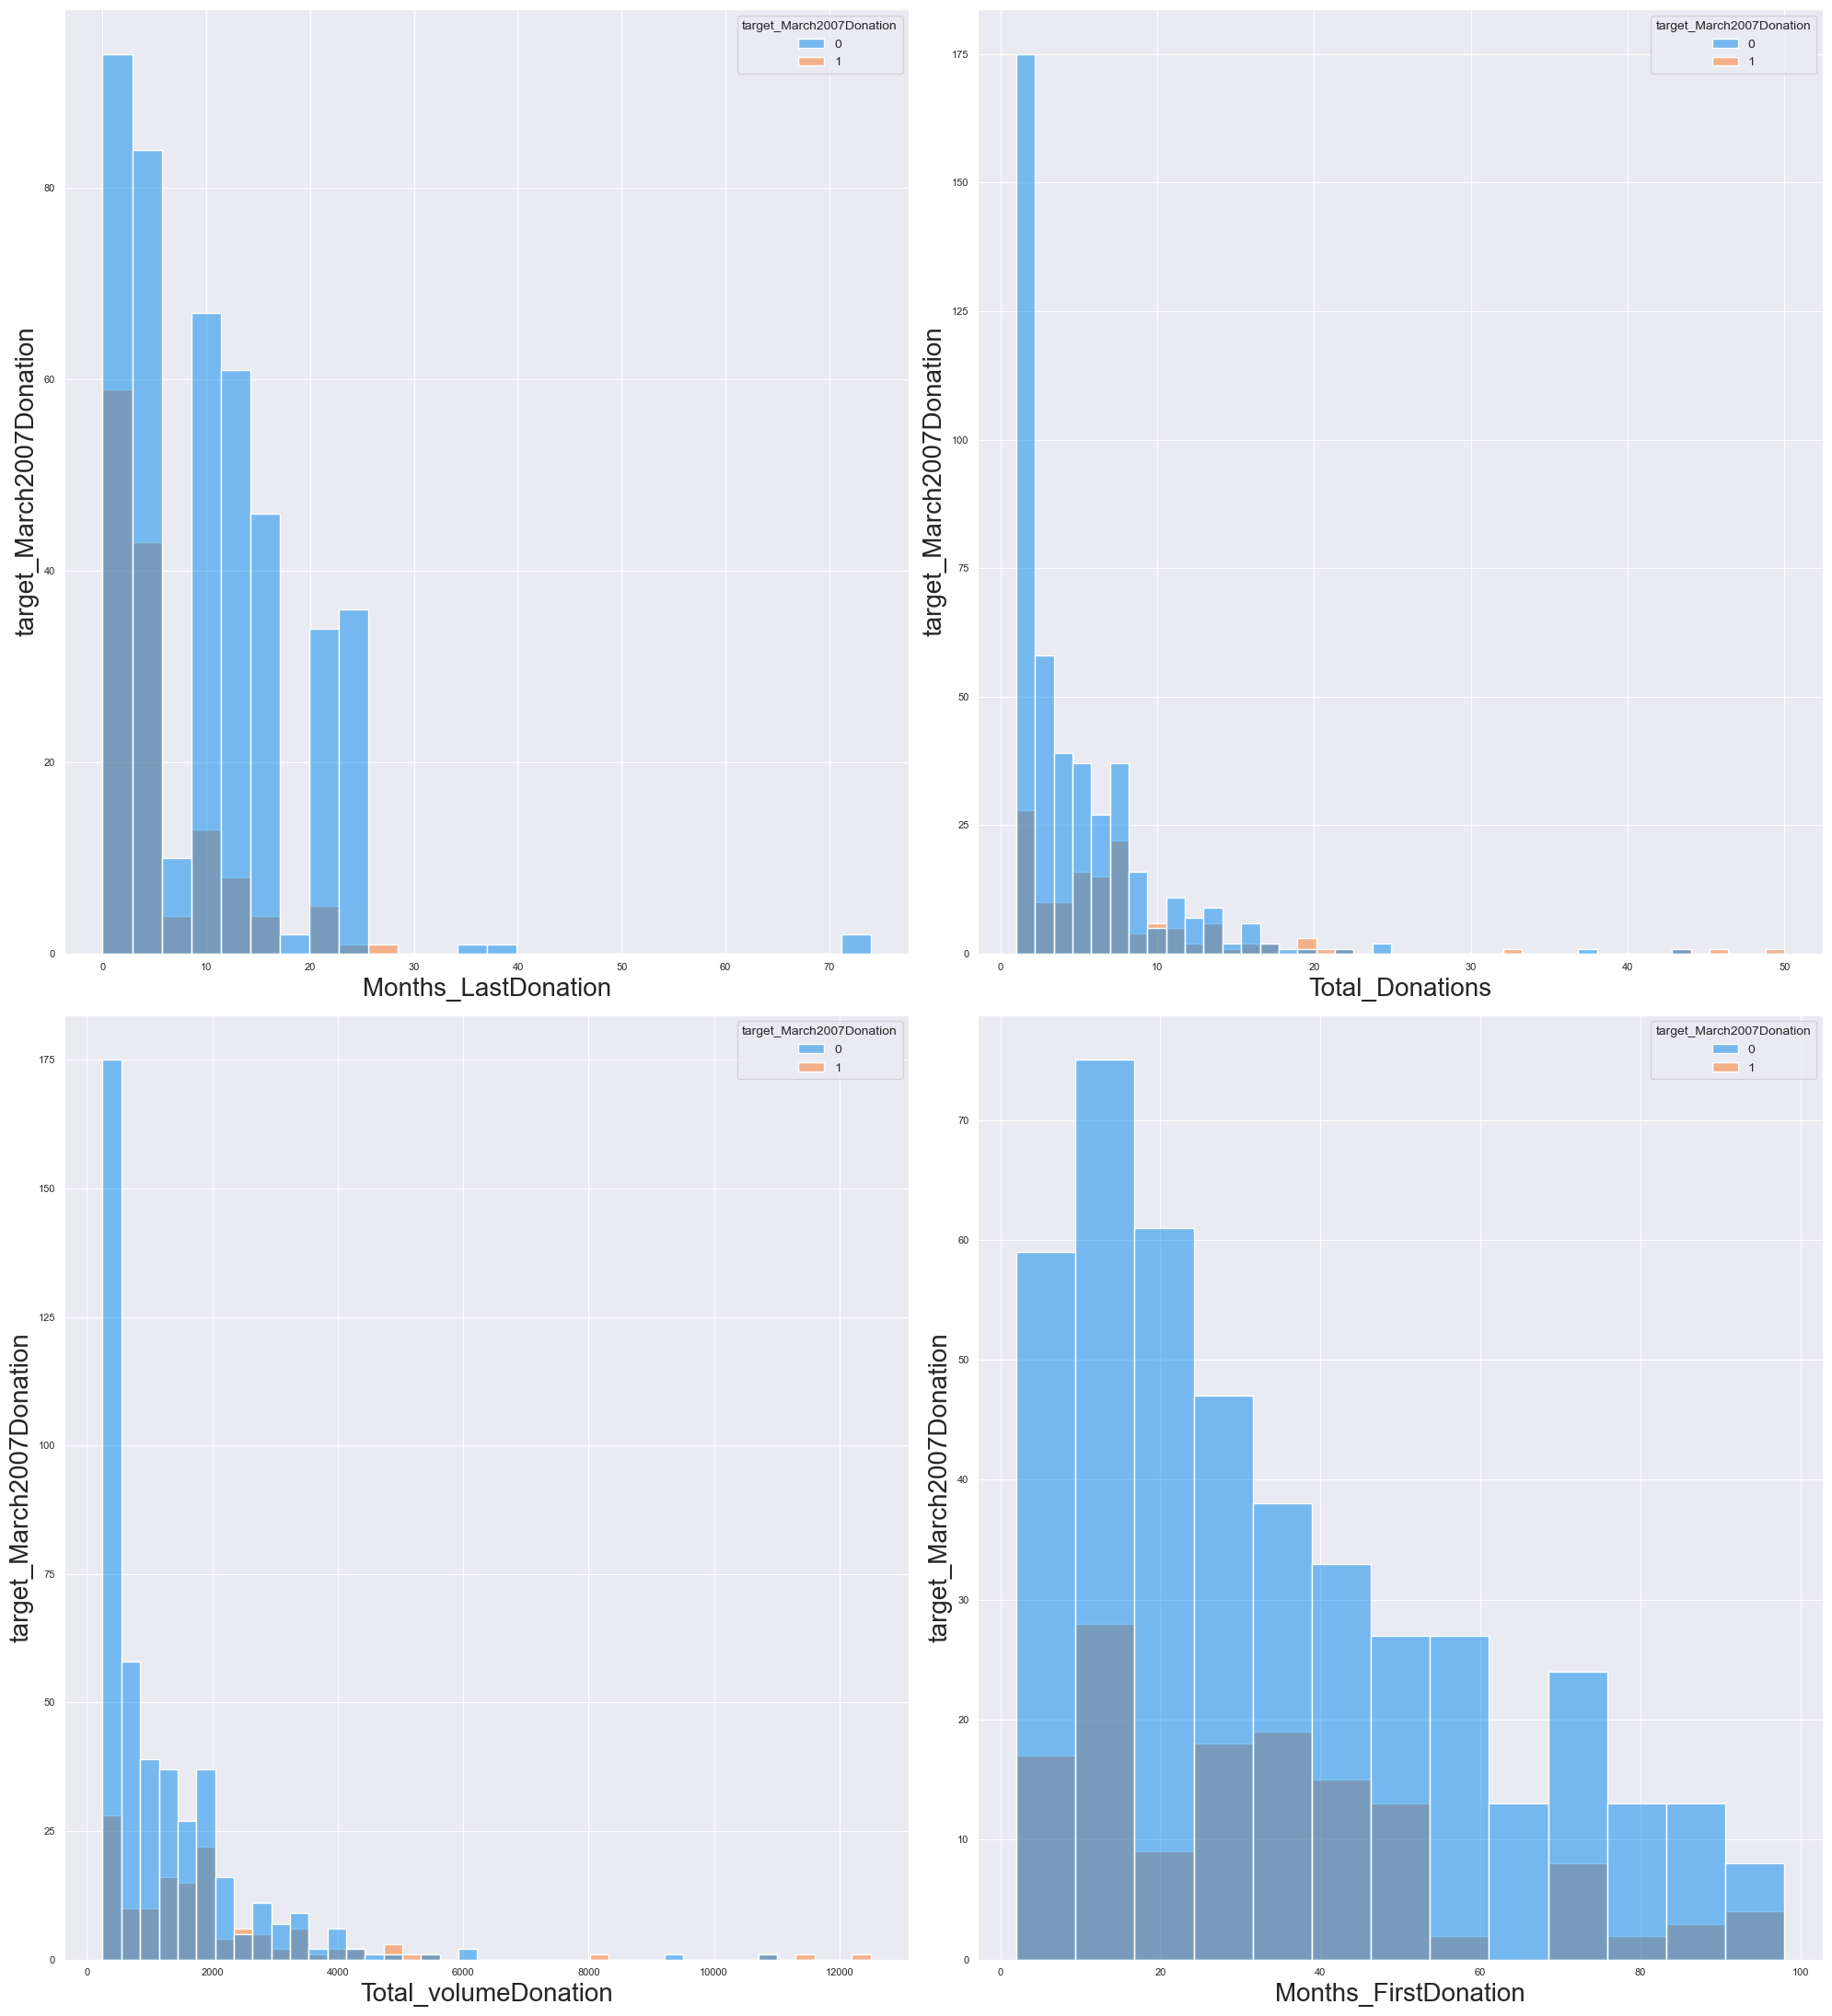

In [13]:
data_1 = data[['Months_LastDonation','Total_Donations','Total_volumeDonation','Months_FirstDonation']]
font={'weight' : 'bold',
        'size': 16} 
sns.set_style('darkgrid')
plt.figure(figsize=(20,22)) # defining canvas size
plotno = 1 # counter

for column in data_1: # iteration of columns / acessing the columns from  dataset 
    if plotno<=9:    # set the limit
        plt.subplot(2,2,plotno) # # plotting 5 graphs (3-rows,3-columns) ,plotnumber is for count
        sns.histplot(x=data_1[column],hue=data.target_March2007Donation) # it give frequency hue =value counts
        plt.ylabel('target_March2007Donation',fontsize=20)# assigning name to y-axis and font size is 20
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

### Multivariate analysis

### Check Relation Of Two Veriable With Respect To Target Veriable (target_March2007Donation)                                                              

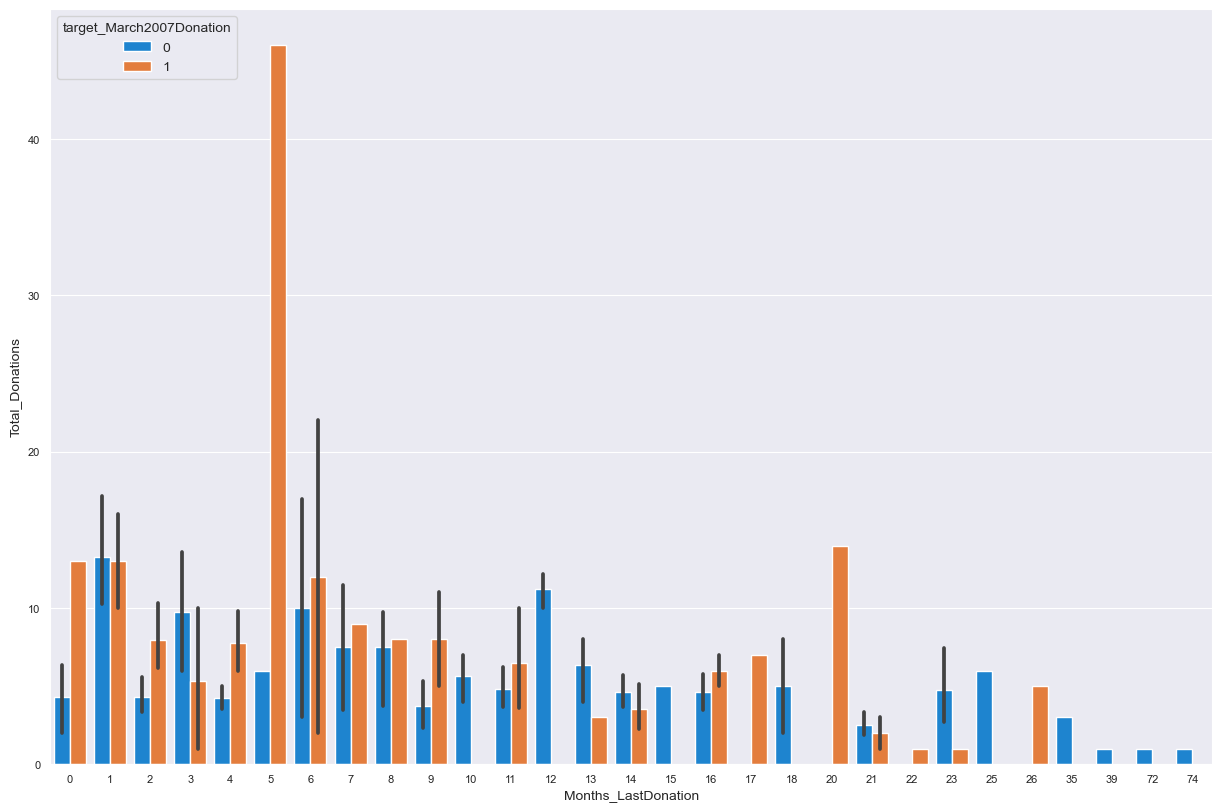

In [14]:
plt.figure(figsize=(15,10))
sns.barplot(x='Months_LastDonation',y='Total_Donations',hue=data.target_March2007Donation,data=data)
plt.show()

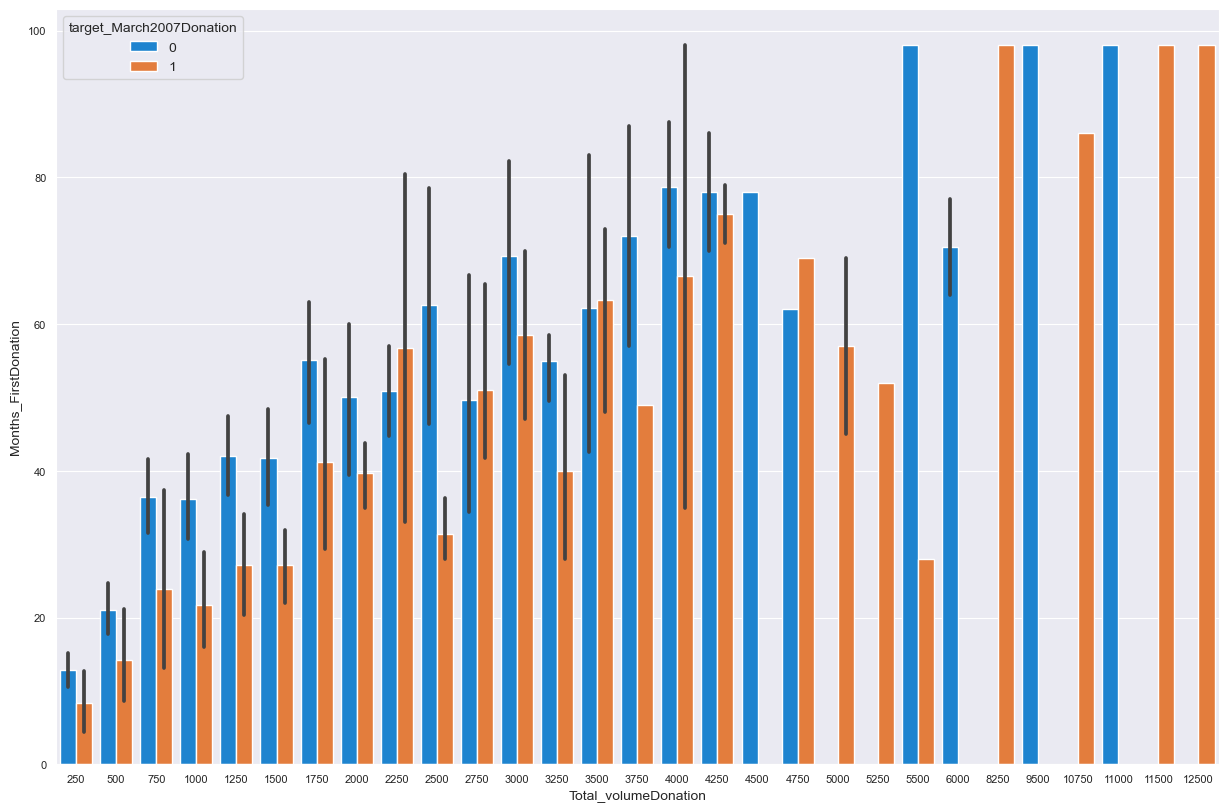

In [15]:
plt.figure(figsize=(15,10))
sns.barplot(x='Total_volumeDonation',y='Months_FirstDonation',hue=data.target_March2007Donation,data=data)
plt.show()

# Data Preprocessing and Feature Engineering

## Check Missing Value

In [16]:
data.isnull().sum()

Donor_ID                    0
Months_LastDonation         0
Total_Donations             0
Total_volumeDonation        0
Months_FirstDonation        0
target_March2007Donation    0
dtype: int64

* Their is no missing value in data

## CHECK OUTLIERS AND IMPUTE OUTLIERS:

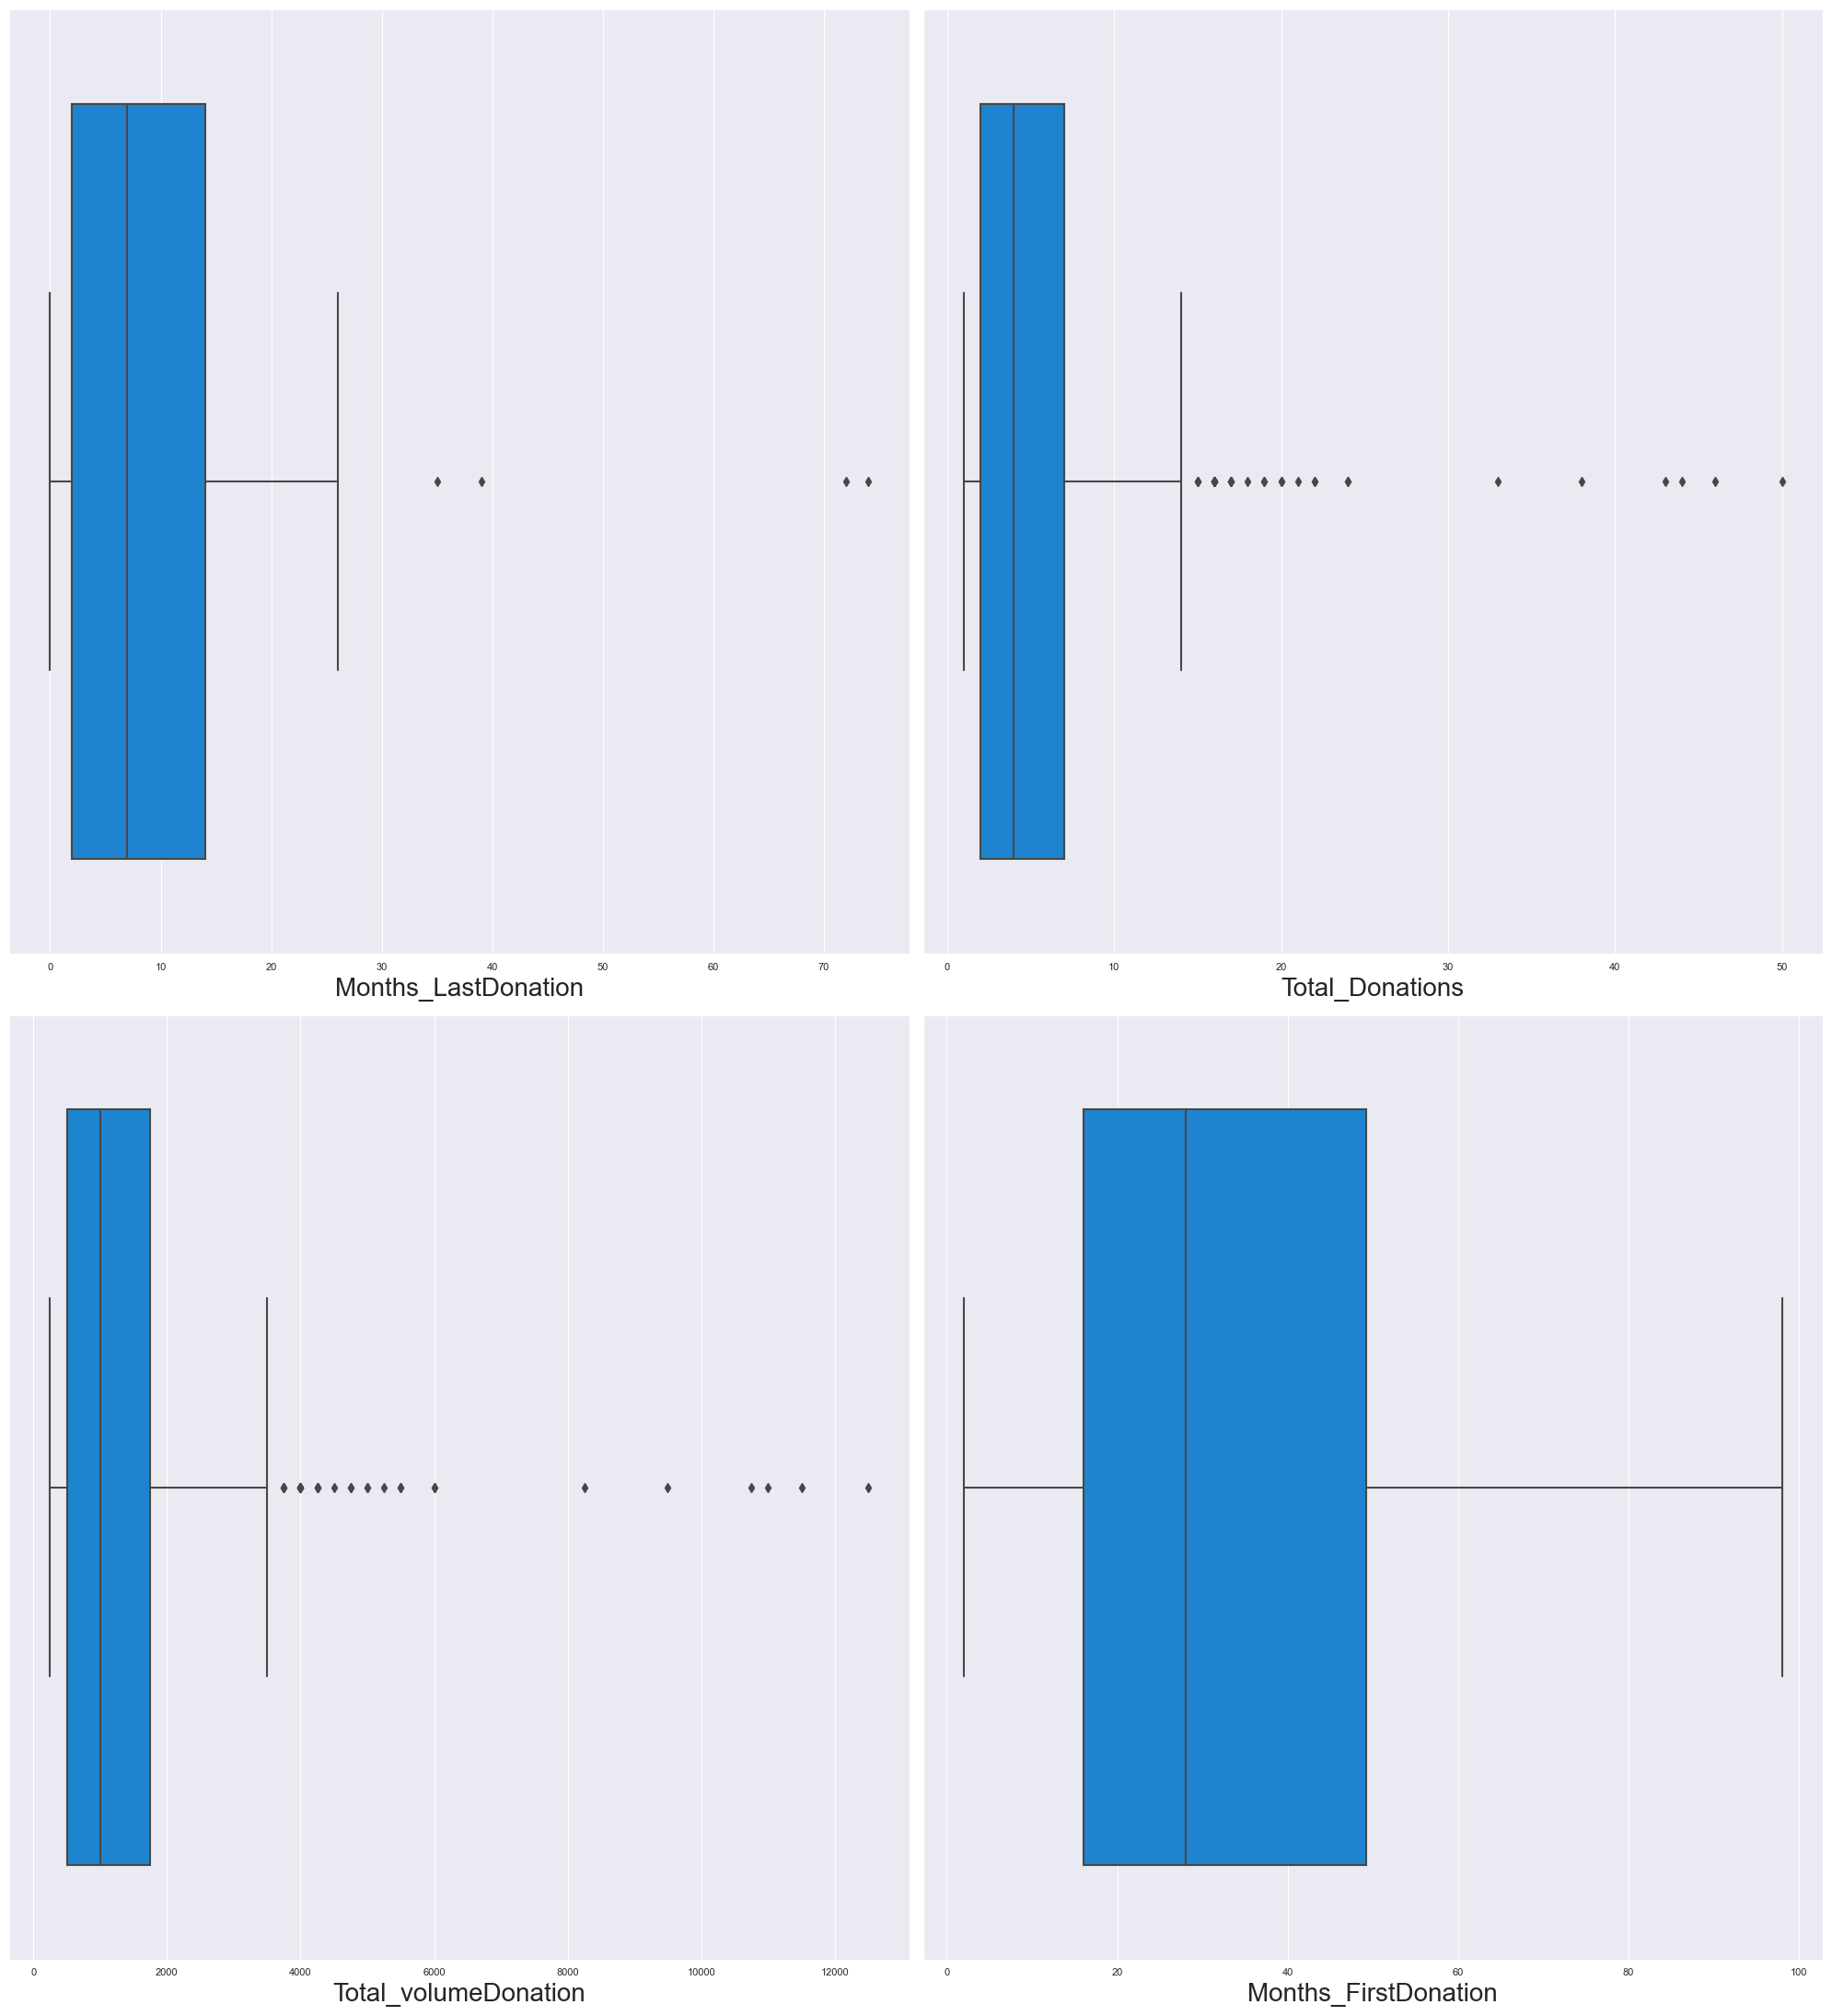

In [17]:
sns.set_style('darkgrid')
plt.figure(figsize=(20,22)) # defining canvas size
plotno = 1 # counter

for column in data_1: # iteration of columns / acessing the columns from  dataset 
    if plotno<=5:    # set the limit
        plt.subplot(2,2,plotno) # # plotting 5 graphs (3-rows,2-columns) ,plotnumber is for count
        sns.boxplot(x= data_1[column]) # Plotting box plots
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

## CHECKING THE DISTRIBUTION BEFORE HANDLE THE OUTLIER

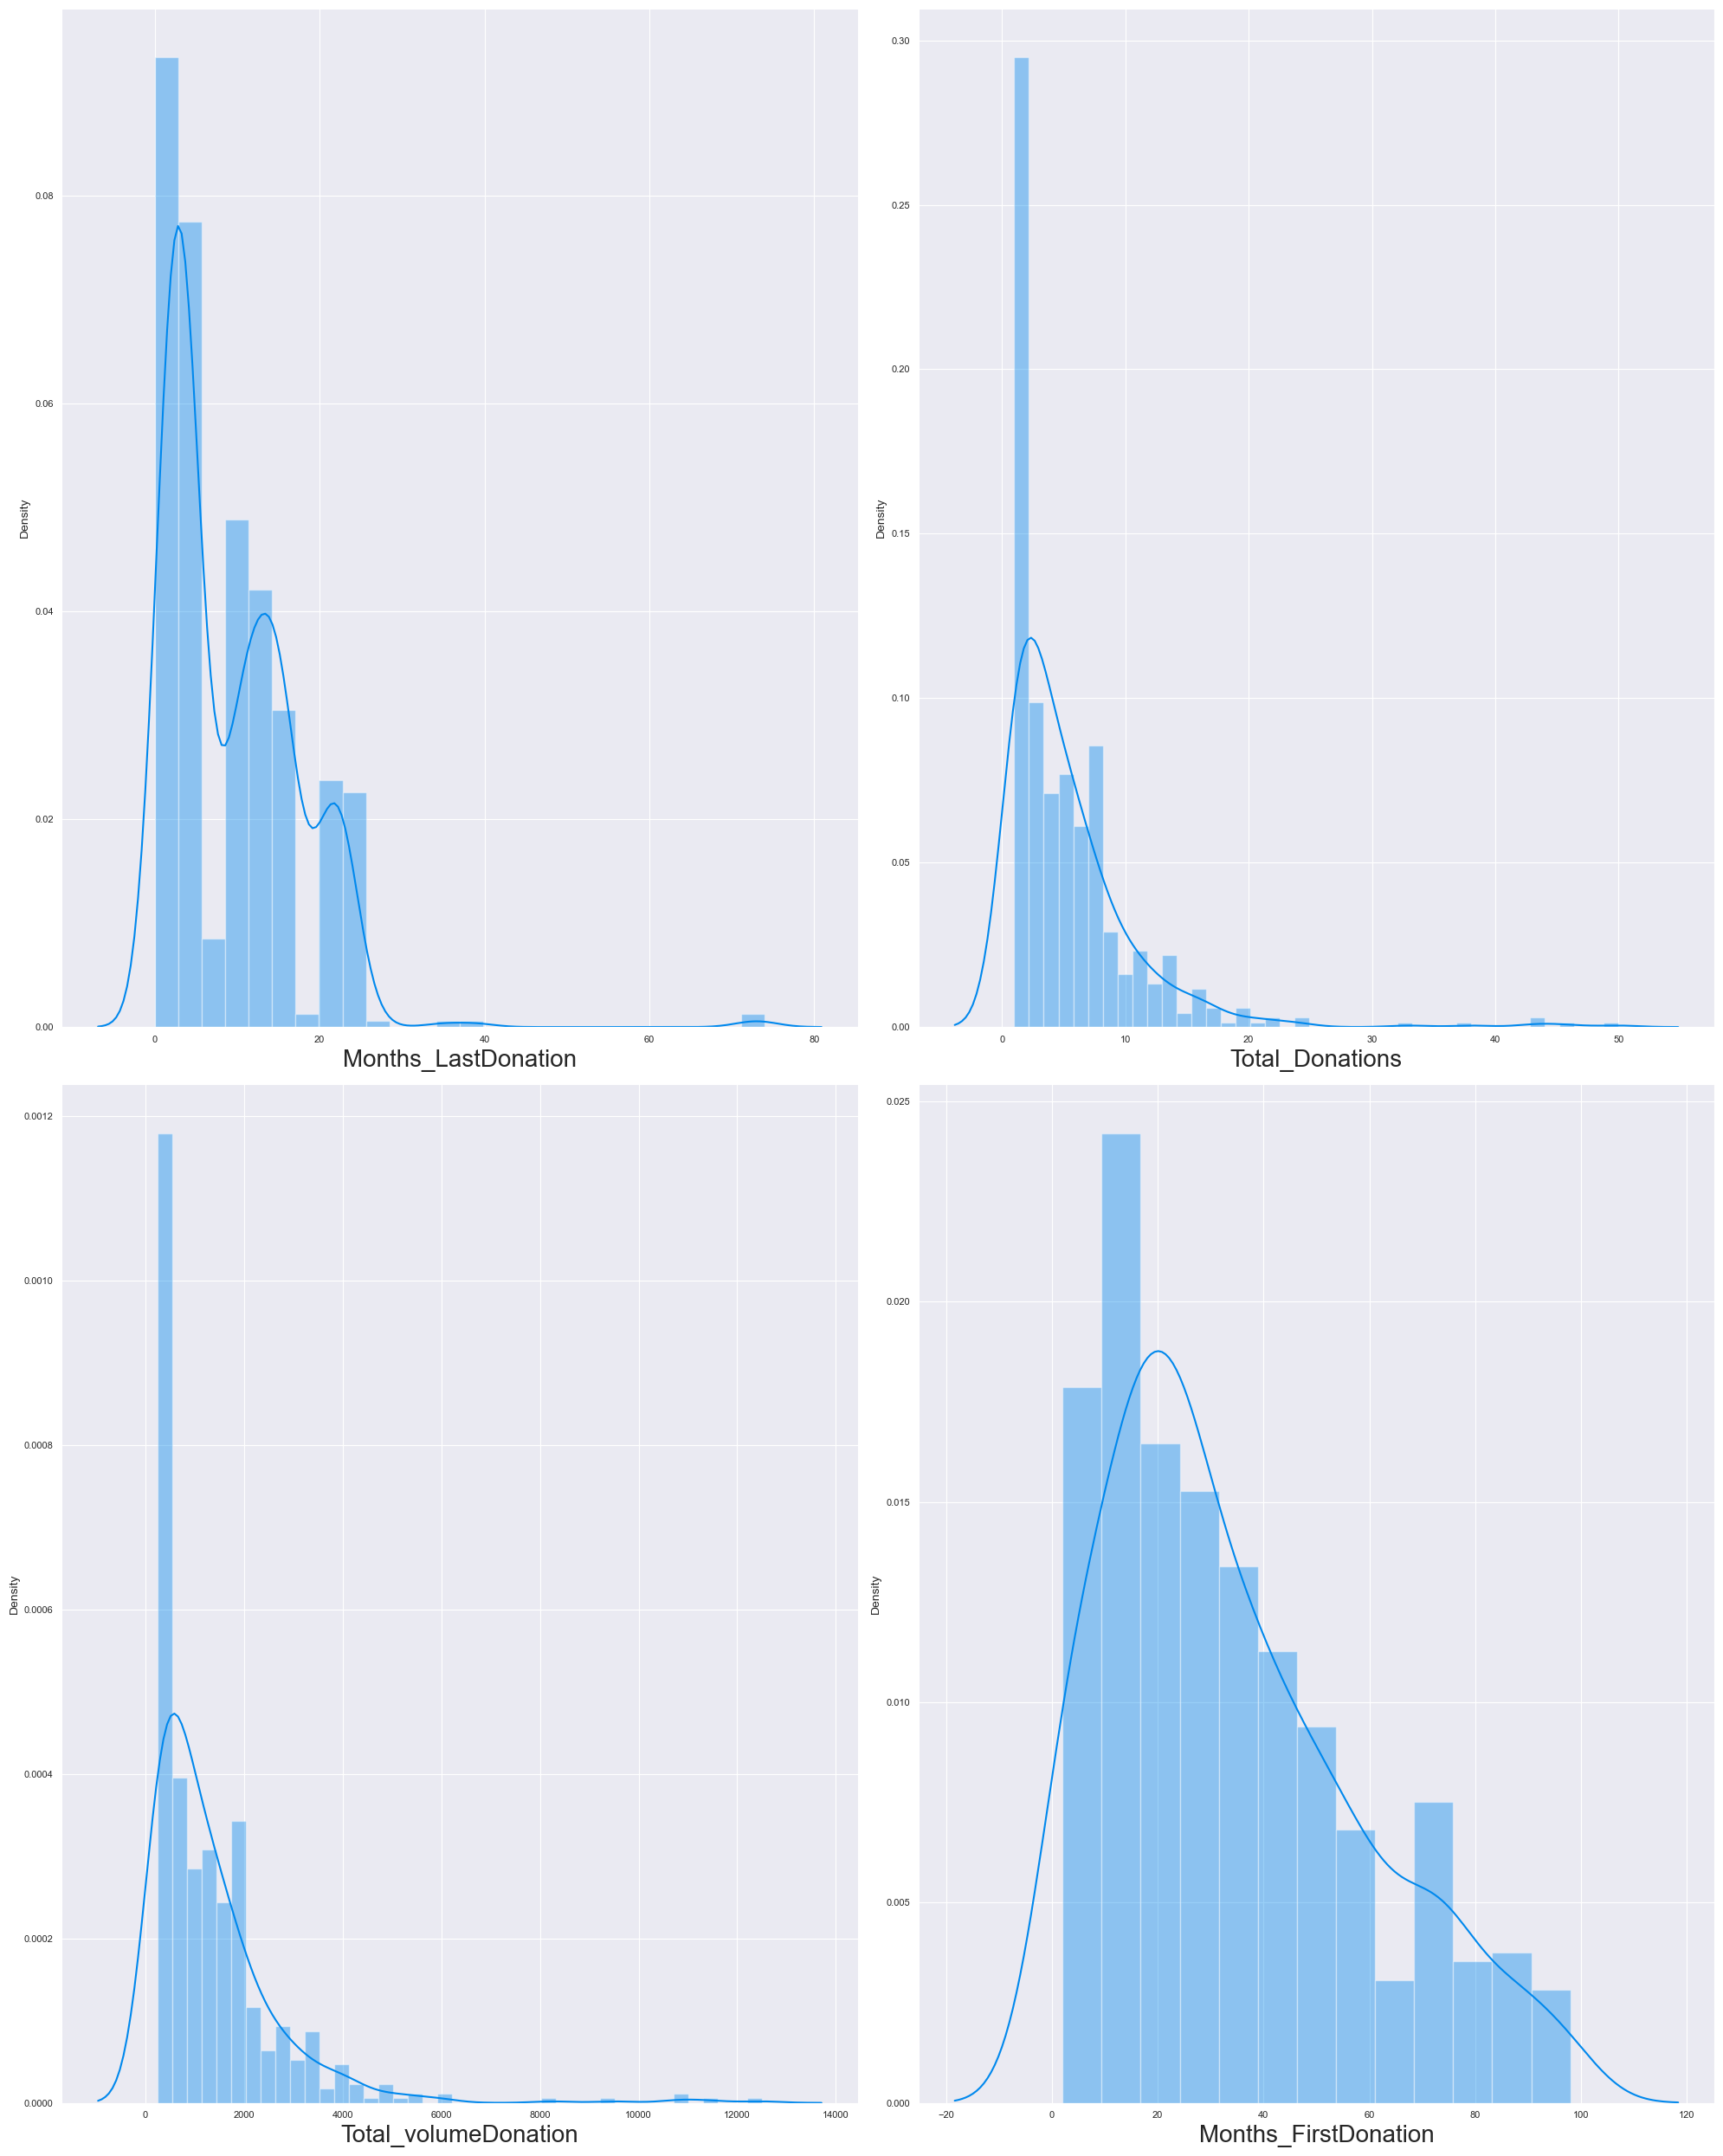

In [18]:
plt.figure(figsize=(20,25)) # defining canvas size
plotno = 1 # counter

for column in data_1: # iteration of columns / acessing the columns from  dataset 
    if plotno<=5:    # set the limit
        plt.subplot(2,2,plotno) # # plotting 36 graphs (9-rows,4-columns) ,plotnumber is for count
        sns.distplot(x=data_1[column]) # Plotting box plots 
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

In [19]:
# Skweness Test
from scipy import stats
for column in data_1:
    print(stats.skew(data_1[column]),column)

2.0657096827922468 Months_LastDonation
3.4942014134194905 Total_Donations
3.494201413419492 Total_volumeDonation
0.765705737811986 Months_FirstDonation


* Total donation and Total volume are positively skewed with same values and may contain outliers.
* Skweness range is not between -0.5 to +0.5.So not normally distributed.

In [20]:
# Kurtosis test
for column in data_1:
    print(stats.kurtosis(data_1[column]),column)

11.307425522378658 Months_LastDonation
18.76607929476726 Total_Donations
18.76607929476727 Total_volumeDonation
-0.20150153643843316 Months_FirstDonation


*  kurtosis.tells the peakedness.it should be 3. but here its not normally distributed.

**These feature are not normally distributed.So we can use IQR method to handle the outliers.**


#### 1. Months_LastDonation.

In [21]:
# Step:1 
from scipy import stats
iqr = stats.iqr(data['Months_LastDonation'],interpolation='midpoint')
print("IQR",iqr)
/
# step:2
Q1 = data['Months_LastDonation'].quantile(0.25)  # first quantile
Q3 = data['Months_LastDonation'].quantile(0.75)  #third quantile
# getting max & min limit
min_limit = Q1 - 1.5*iqr
print('minimum limit',min_limit)
max_limit = Q3 + 1.5*iqr
print('maximum limit',max_limit)

IQR 12.0
minimum limit -16.0
maximum limit 32.0


In [22]:
# get the percentage
len(data.loc[data['Months_LastDonation'] > max_limit])/260601*100

0.0015349135268091835

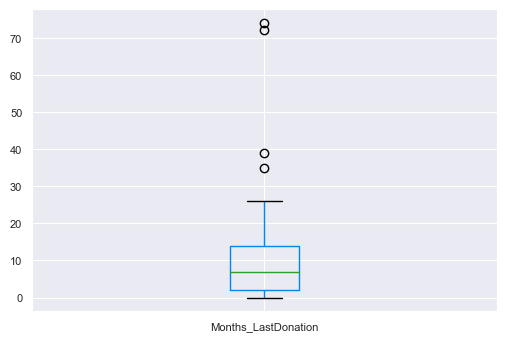

In [23]:
data.boxplot('Months_LastDonation')
plt.show()

In [24]:
# impute outlier both side
data.loc[data['Months_LastDonation'] > max_limit,'Months_LastDonation'] = data['Months_LastDonation'].median()

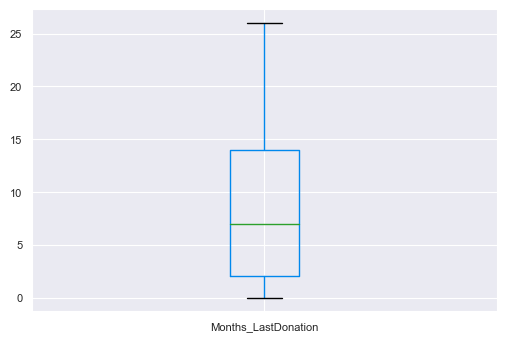

In [25]:
data.boxplot('Months_LastDonation')
plt.show()

#### 2.Total_Donations.

In [26]:
# Step:1 
from scipy import stats
iqr = stats.iqr(data['Total_Donations'],interpolation='midpoint')
print("IQR",iqr)
/
# step:2
Q1 = data['Total_Donations'].quantile(0.25)  # first quantile
Q3 = data['Total_Donations'].quantile(0.75)  #third quantile
# getting max & min limit
min_limit = Q1 - 1.5*iqr
print('minimum limit',min_limit)
max_limit = Q3 + 1.5*iqr
print('maximum limit',max_limit)

IQR 5.0
minimum limit -5.5
maximum limit 14.5


In [27]:
# get the percentage
len(data.loc[data['Total_Donations'] > max_limit])/260601*100

0.011895579832771171

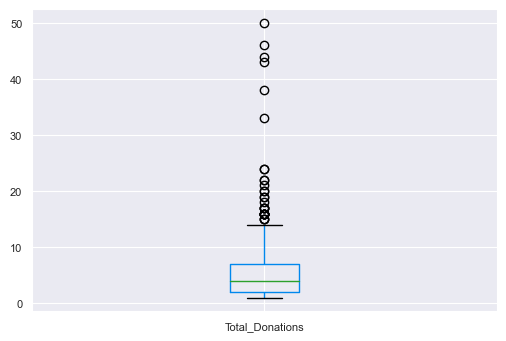

In [28]:
data.boxplot('Total_Donations')
plt.show()

In [29]:
# impute outlier both side
data.loc[data['Total_Donations'] > max_limit,'Total_Donations'] = data['Total_Donations'].median()

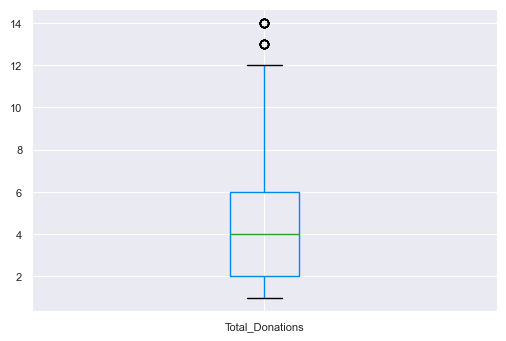

In [30]:
data.boxplot('Total_Donations')
plt.show()

### 3.Total_volumeDonation.

In [31]:
# Step:1 
from scipy import stats
iqr = stats.iqr(data['Total_volumeDonation'],interpolation='midpoint')
print("IQR",iqr)
/
# step:2
Q1 = data['Total_volumeDonation'].quantile(0.25)  # first quantile
Q3 = data['Total_volumeDonation'].quantile(0.75)  #third quantile
# getting max & min limit
min_limit = Q1 - 1.5*iqr
print('minimum limit',min_limit)
max_limit = Q3 + 1.5*iqr
print('maximum limit',max_limit)

IQR 1250.0
minimum limit -1375.0
maximum limit 3625.0


In [32]:
# get the percentage
len(data.loc[data['Total_volumeDonation'] > max_limit])/260601*100

0.011895579832771171

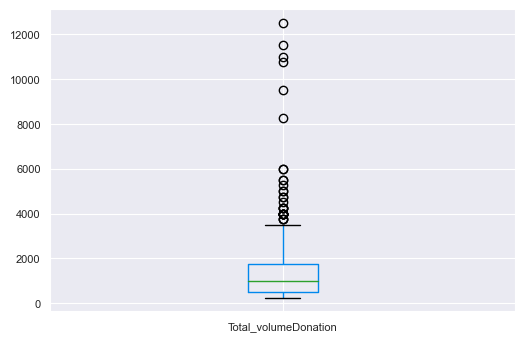

In [33]:
data.boxplot('Total_volumeDonation')
plt.show()

In [34]:
# impute outlier both side
data.loc[data['Total_volumeDonation'] > max_limit,'Total_volumeDonation'] = data['Total_volumeDonation'].median()

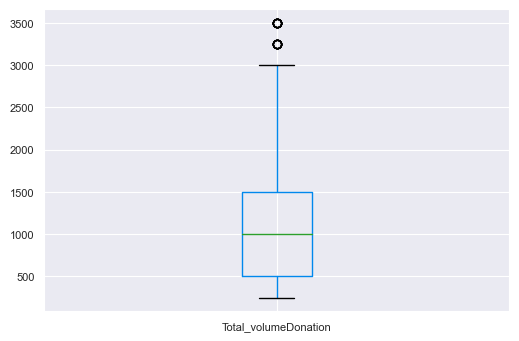

In [35]:
data.boxplot('Total_volumeDonation')
plt.show()

### CHECKING DISTRIBUTION AFTER IMPUTE OUTLIER

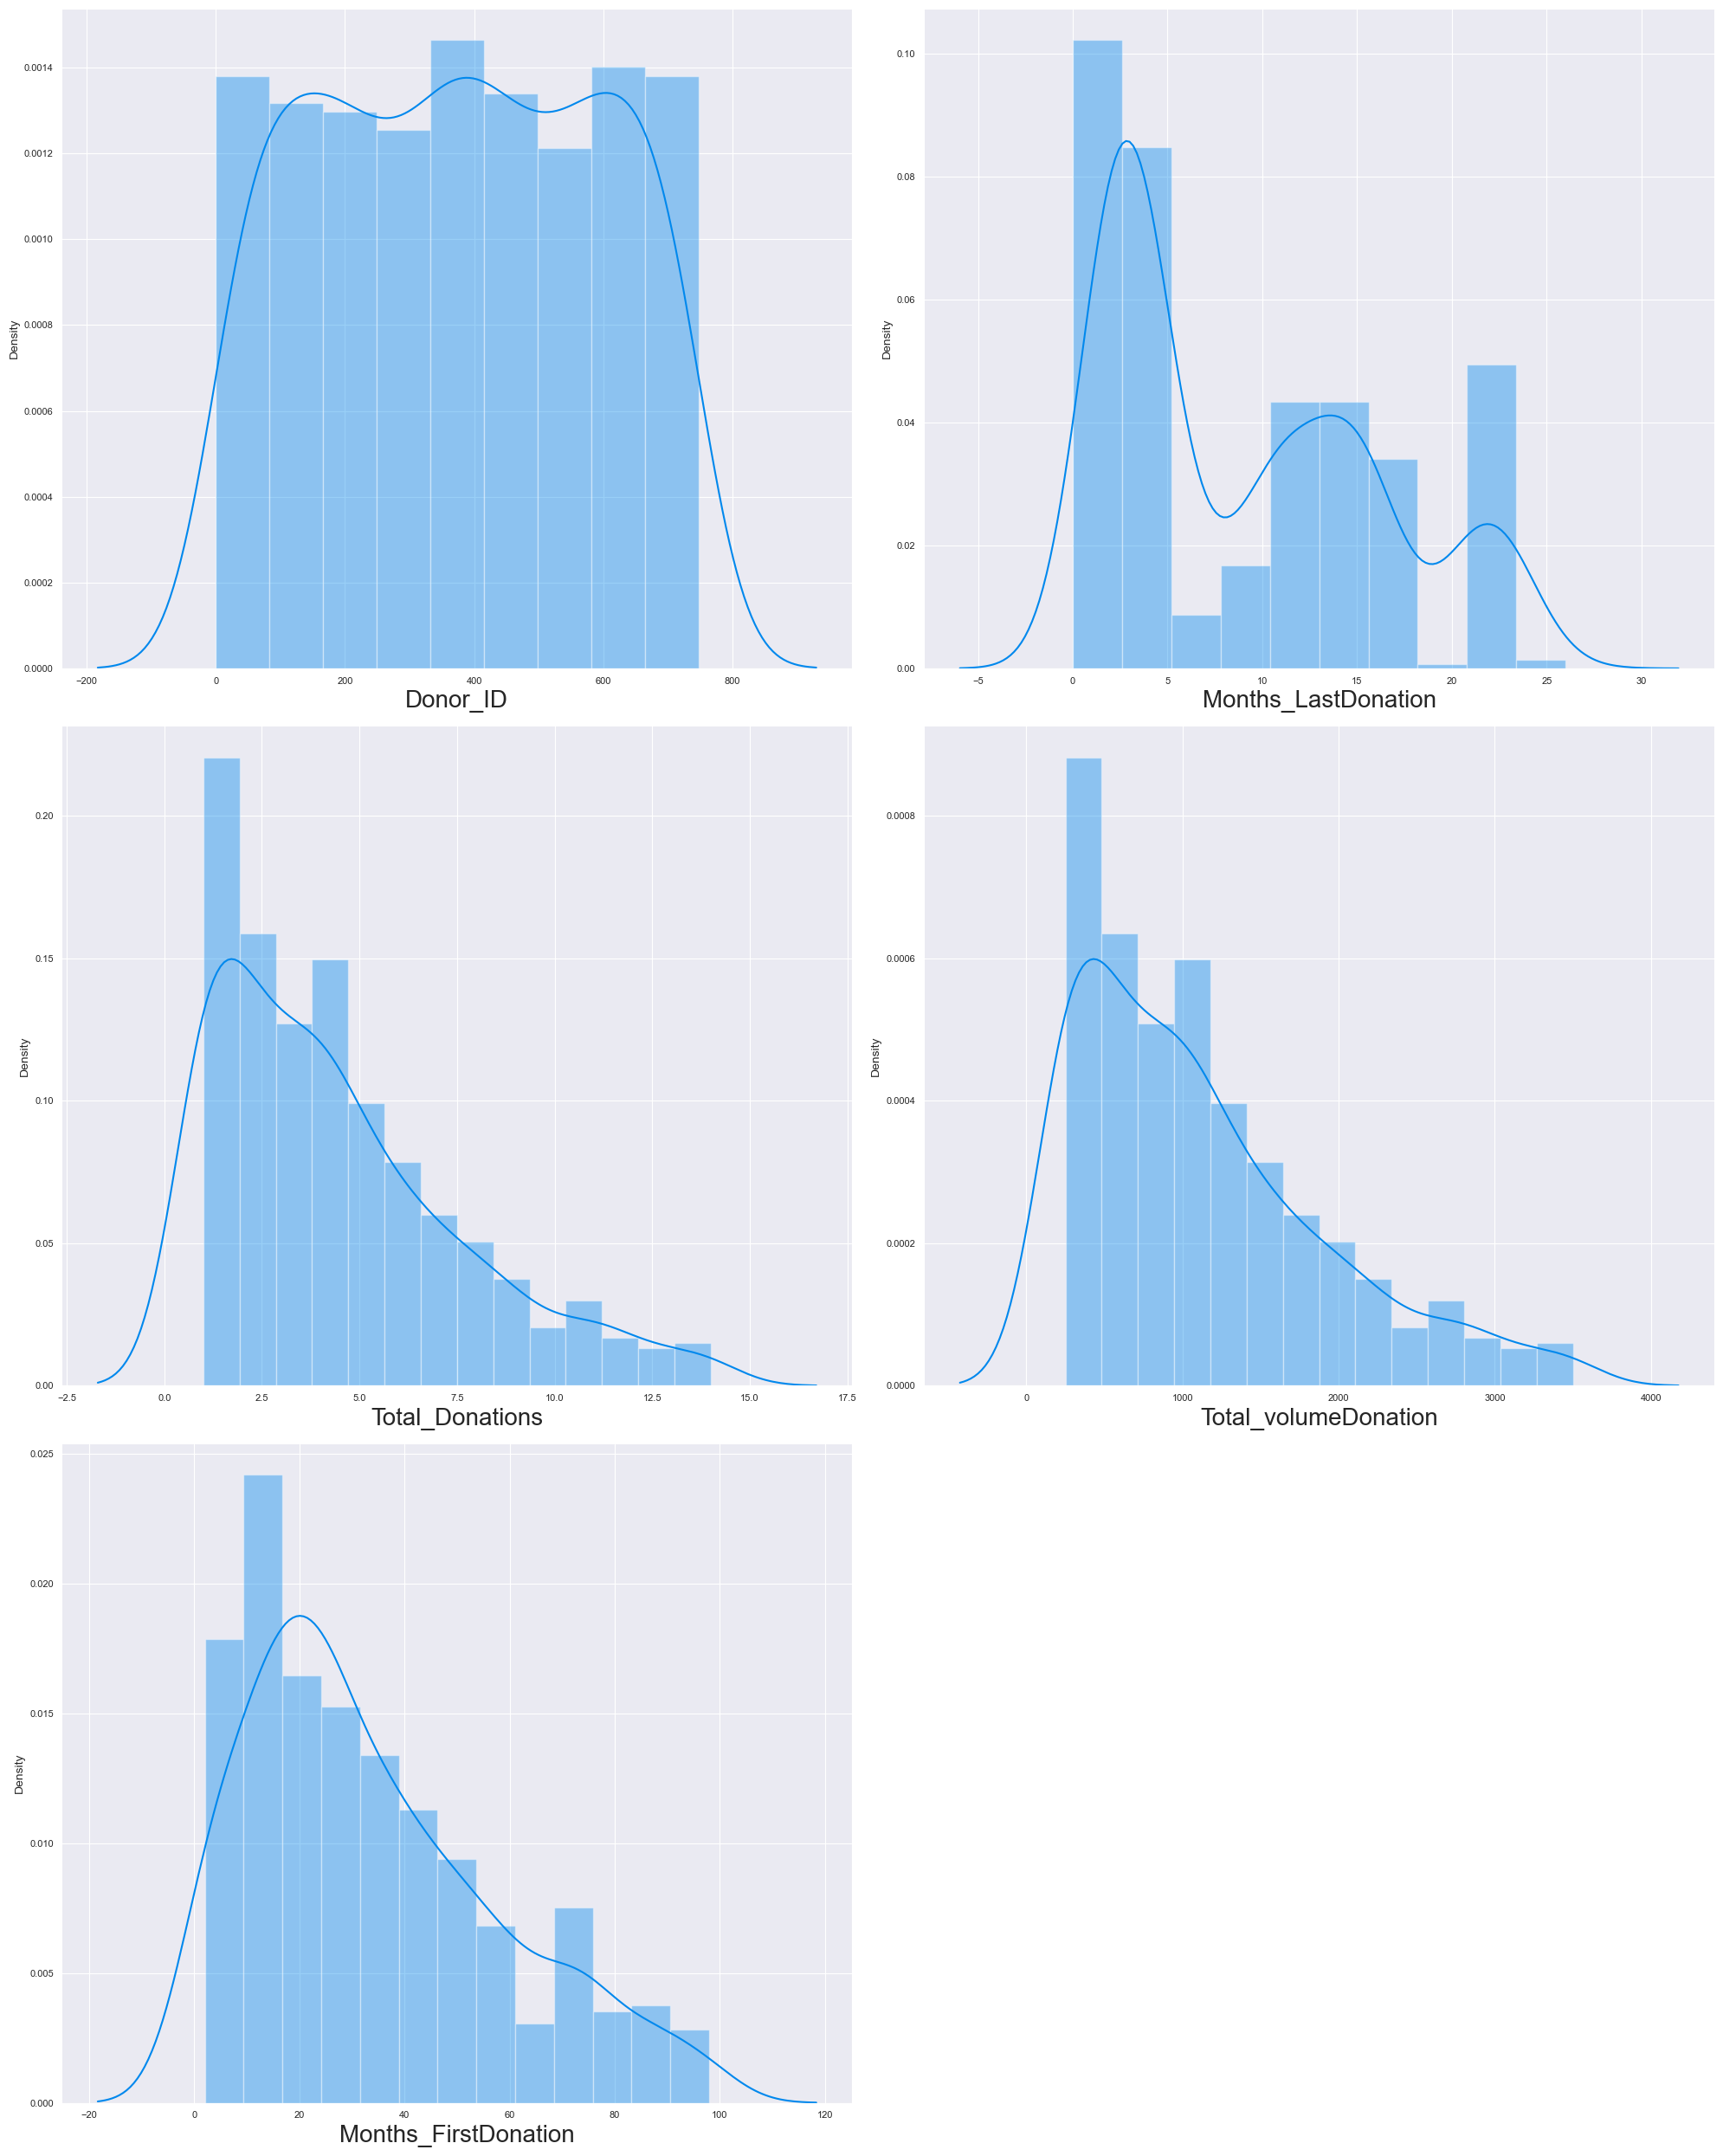

In [36]:
plt.figure(figsize=(20,25)) # defining canvas size
plotno = 1 # counter

for column in data: # iteration of columns / acessing the columns from  dataset 
    if plotno<=5:    # set the limit
        plt.subplot(3,2,plotno) # # plotting 13 graphs (5-rows,3-columns) ,plotnumber is for count
        sns.distplot(x=data[column]) # Plotting box plots 
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

### SCALING THE DATA : -

In [37]:
# 1. standard scaling
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
data[['Months_LastDonation','Total_Donations','Total_volumeDonation','Months_FirstDonation']]=scale.fit_transform(data[['Months_LastDonation','Total_Donations','Total_volumeDonation','Months_FirstDonation']])

In [38]:
data.head(10)

,Donor_ID,Months_LastDonation,Total_Donations,Total_volumeDonation,Months_FirstDonation,target_March2007Donation
0,619,-1.005231,-0.130916,-0.130916,2.641824,1
1,664,-1.288160,2.673493,2.673493,-0.249946,1
2,441,-1.146695,-0.130916,-0.130916,0.039231,1
3,160,-1.005231,-0.130916,-0.130916,0.452341,1
4,358,-1.146695,-0.130916,-0.130916,1.774293,0
5,335,-0.722303,-0.130916,-0.130916,-1.241410,0
6,47,-1.005231,0.803887,0.803887,-0.828300,1
7,164,-1.146695,2.361892,2.361892,0.039231,0
8,736,-0.580838,-0.130916,-0.130916,2.641824,1
9,436,-1.288160,-0.442517,-0.442517,-1.241410,0


## FEATURE SELECTION

### DROP UNIQUE AND CONTANT FEATURES

In [39]:
data.drop(['Donor_ID'],axis=1,inplace=True)


In [40]:
data.head()

,Months_LastDonation,Total_Donations,Total_volumeDonation,Months_FirstDonation,target_March2007Donation
0,-1.005231,-0.130916,-0.130916,2.641824,1
1,-1.288160,2.673493,2.673493,-0.249946,1
2,-1.146695,-0.130916,-0.130916,0.039231,1
3,-1.005231,-0.130916,-0.130916,0.452341,1
4,-1.146695,-0.130916,-0.130916,1.774293,0


### CHECKING CORELATION:- 
  ##### Heatmap: 
   *    A heatmap is a graphical representation of data that uses a system of color-coding to represent different values


<AxesSubplot:>

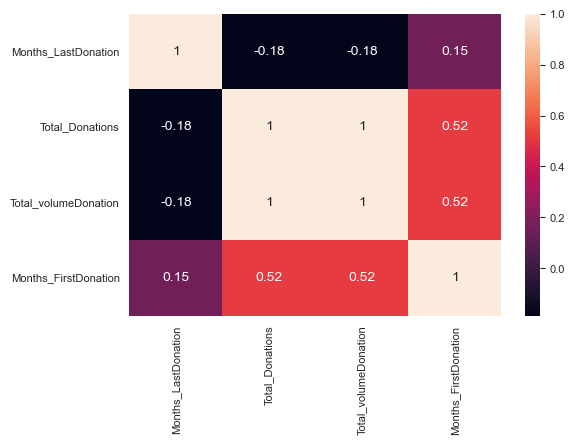

In [41]:
sns.heatmap(data.drop('target_March2007Donation',axis=1).corr(),annot=True)

**Total_Donations and  Total_volumeDonation are highly correlated we can remove one of them.**

In [42]:
data.drop(['Total_Donations'],axis=1,inplace=True)

In [43]:
 #To get highly corelated feature 
pd.set_option('display.max_rows',None)
corrmat = data.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat [corrmat >= 0.9] # Set threshold 0.9
corrmat = corrmat [corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1','feature2','corr']
corrmat

,feature1,feature2,corr


*   Now we confirm their is no highly correlated feature is present.

In [44]:
data.head()

,Months_LastDonation,Total_volumeDonation,Months_FirstDonation,target_March2007Donation
0,-1.005231,-0.130916,2.641824,1
1,-1.288160,2.673493,-0.249946,1
2,-1.146695,-0.130916,0.039231,1
3,-1.005231,-0.130916,0.452341,1
4,-1.146695,-0.130916,1.774293,0


### CHECKING DUPLICATES

In [45]:
data.duplicated().sum()

155

In [46]:
data =data.drop_duplicates()

In [47]:
data.duplicated().sum()

0

### BALANCING THE TARGET FEATURE

In [48]:
X = data.iloc[:,:-1]
y = data.target_March2007Donation

In [49]:
y.value_counts()

0    305
1    116
Name: target_March2007Donation, dtype: int64

* No need to balance the data

## CREATING TRAINING AND TESTING DATA

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [51]:
# check the shape of X train, y train, X test and y test
X_train.shape

(336, 3)

In [52]:
X_test.shape

(85, 3)

In [53]:
y_train.shape

(336,)

In [54]:
y_test.shape

(85,)

## Model Building :-

### 1. Logisticregression :-

In [55]:
# Step:1 importing library
from sklearn.linear_model import LogisticRegression

# Step:2 Object creation
log_model = LogisticRegression(solver='liblinear',
    random_state=42)

# Step:3 Fitting the training data
log_model.fit(X_train,y_train)

# Step:4 Prediction on test data
y_log_predict = log_model.predict(X_test)

# Step:5 Prediction on training data
train_log_predict = log_model.predict(X_train)

### EVALUATION

### TRAINING ACCURACY

In [56]:
# importing library
from sklearn.metrics import accuracy_score,recall_score,f1_score,classification_report,accuracy_score,roc_auc_score
log_train_accuracy = accuracy_score(train_log_predict,y_train)
print("Training accuracy of Logistic regression model",log_train_accuracy*100)
print("Logistic regression training Classification report: \n",classification_report(train_log_predict,y_train))

Training accuracy of Logistic regression model 72.61904761904762
Logistic regression training Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.73      0.84       334
           1       0.00      0.00      0.00         2

    accuracy                           0.73       336
   macro avg       0.50      0.37      0.42       336
weighted avg       0.99      0.73      0.84       336



### TESTING ACCURACY

In [57]:
log_test_accuracy = accuracy_score(y_log_predict,y_test)
print("Testing accuracy ogof Logistic regession model",log_test_accuracy*100)
print("Logistic regression testing Classification report: \n",classification_report(y_log_predict,y_test))

Testing accuracy ogof Logistic regession model 70.58823529411765
Logistic regression testing Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.70      0.83        84
           1       0.04      1.00      0.07         1

    accuracy                           0.71        85
   macro avg       0.52      0.85      0.45        85
weighted avg       0.99      0.71      0.82        85



In [58]:
#Printingthe roc auc score
roc_auc_score(y_log_predict,y_test)

0.8511904761904762

### USE BAGGING ON LOGISTIC REGRESSION MODEL


In [59]:
# Step:1 Create logistic regression object
log_reg1 = LogisticRegression()

# Step:2 importing library and creating bagging object
from sklearn.ensemble import BaggingClassifier
bagg = BaggingClassifier(base_estimator=log_reg1,n_estimators=45)
#base_estimator---> algorithm which you want to pass
#n_estimotors-----> number of base learners

# Step:3 Fitting the training data
bagg.fit(X_train,y_train)

# Step:4 Prediction on test data
bagg_predict = bagg.predict(X_test)

In [60]:
bagg_recall = accuracy_score(bagg_predict,y_test)
print("Racall score after bagging",bagg_recall)

Racall score after bagging 0.7058823529411765


## 2.Support Vector Machine

In [61]:
# importing library
from sklearn.svm import SVC

# Object Creaation
svc = SVC()

# Fitting training and testing data
svc.fit(X_train,y_train)

# Prediction on train data
svc_train_predict = svc.predict(X_train)

# Prediction on test data
svc_test_predict = svc.predict(X_test)

### TRAINING ACCURACY

In [62]:
# import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report,confusion_matrix
svc_train_accuracy = accuracy_score(svc_train_predict,y_train)
print("Training accuracy of support vector classifier model",svc_train_accuracy*100)
print("support vector classifier Classification report: \n",classification_report(svc_train_predict,y_train))

Training accuracy of support vector classifier model 76.48809523809523
support vector classifier Classification report: 
               precision    recall  f1-score   support

           0       0.96      0.77      0.86       305
           1       0.23      0.68      0.35        31

    accuracy                           0.76       336
   macro avg       0.60      0.73      0.60       336
weighted avg       0.89      0.76      0.81       336



### TESTING ACCURACY


In [63]:
svc_test_accuracy = accuracy_score(svc_test_predict,y_test)
print("Testing accuracy of support vector classifier model",svc_test_accuracy*100)
print("support vector classifier Classification report: \n",classification_report(svc_test_predict,y_test))

Testing accuracy of support vector classifier model 70.58823529411765
support vector classifier Classification report: 
               precision    recall  f1-score   support

           0       0.95      0.72      0.82        78
           1       0.15      0.57      0.24         7

    accuracy                           0.71        85
   macro avg       0.55      0.64      0.53        85
weighted avg       0.88      0.71      0.77        85



In [64]:
#Printingthe roc auc score
roc_auc_score(svc_test_predict,y_test)

0.6446886446886446

### HYPER PARAMETER TUNNING WITH GRID SEARCH CV

In [65]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,0.5,10,50,60,70,80],
             'gamma':[1,0.1,0.001,0.0001,0.00001],
             'random_state':(list(range(1,20)))}
model = SVC() # Object creation
grid = GridSearchCV(model,param_grid,refit=True,verbose=2,scoring='f1',cv=5)

# Step:10 fitting the model for grid search
grid.fit(X,y)

Fitting 5 folds for each of 665 candidates, totalling 3325 fits
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=3; total time=   0.0s
[CV] END .....................C=0.1, gamma=1,

[CV] END ...................C=0.1, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ...................

[CV] END .................C=0.1, gamma=0.001, random_state=4; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=4; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=4; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=5; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=5; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=5; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=5; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=5; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=6; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=6; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=6; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=6; total time=   0.0s
[CV] END .................C=

[CV] END ................C=0.1, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ...............C=0.

[CV] END ................C=0.1, gamma=1e-05, random_state=11; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=11; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=11; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=11; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=11; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=12; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=12; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=12; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=12; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=12; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=13; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=13; total time=   0.0s
[CV] END ................C=0

[CV] END ....................C=0.5, gamma=1, random_state=14; total time=   0.0s
[CV] END ....................C=0.5, gamma=1, random_state=14; total time=   0.0s
[CV] END ....................C=0.5, gamma=1, random_state=14; total time=   0.0s
[CV] END ....................C=0.5, gamma=1, random_state=14; total time=   0.0s
[CV] END ....................C=0.5, gamma=1, random_state=14; total time=   0.0s
[CV] END ....................C=0.5, gamma=1, random_state=15; total time=   0.0s
[CV] END ....................C=0.5, gamma=1, random_state=15; total time=   0.0s
[CV] END ....................C=0.5, gamma=1, random_state=15; total time=   0.0s
[CV] END ....................C=0.5, gamma=1, random_state=15; total time=   0.0s
[CV] END ....................C=0.5, gamma=1, random_state=15; total time=   0.0s
[CV] END ....................C=0.5, gamma=1, random_state=16; total time=   0.0s
[CV] END ....................C=0.5, gamma=1, random_state=16; total time=   0.0s
[CV] END ...................

[CV] END ..................C=0.5, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ..................C

[CV] END ................C=0.5, gamma=0.001, random_state=19; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=19; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=19; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=19; total time=   0.0s
[CV] END ................C=0.5, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END ................C=0.5, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END ................C=0.5, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END ................C=0.5, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END ................C=0.5, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END ................C=0.5, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END ................C=0.5, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END ................C=0.5, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END ................C=0

[CV] END .................C=0.5, gamma=1e-05, random_state=2; total time=   0.0s
[CV] END .................C=0.5, gamma=1e-05, random_state=2; total time=   0.0s
[CV] END .................C=0.5, gamma=1e-05, random_state=3; total time=   0.0s
[CV] END .................C=0.5, gamma=1e-05, random_state=3; total time=   0.0s
[CV] END .................C=0.5, gamma=1e-05, random_state=3; total time=   0.0s
[CV] END .................C=0.5, gamma=1e-05, random_state=3; total time=   0.0s
[CV] END .................C=0.5, gamma=1e-05, random_state=3; total time=   0.0s
[CV] END .................C=0.5, gamma=1e-05, random_state=4; total time=   0.0s
[CV] END .................C=0.5, gamma=1e-05, random_state=4; total time=   0.0s
[CV] END .................C=0.5, gamma=1e-05, random_state=4; total time=   0.0s
[CV] END .................C=0.5, gamma=1e-05, random_state=4; total time=   0.0s
[CV] END .................C=0.5, gamma=1e-05, random_state=4; total time=   0.0s
[CV] END .................C=

[CV] END ......................C=10, gamma=1, random_state=5; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=5; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=5; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=5; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=5; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=6; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=6; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=6; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=6; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=6; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=7; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=7; total time=   0.0s
[CV] END ...................

[CV] END ....................C=10, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=9; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=9; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=9; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=9; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=9; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ...................

[CV] END .................C=10, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=12; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=12; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=12; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=12; total time=   0.0s
[CV] END .................C=

[CV] END ................C=10, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ................C=1

[CV] END .................C=10, gamma=1e-05, random_state=14; total time=   0.0s
[CV] END .................C=10, gamma=1e-05, random_state=14; total time=   0.0s
[CV] END .................C=10, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END .................C=10, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END .................C=10, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END .................C=10, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END .................C=10, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END .................C=10, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END .................C=10, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END .................C=10, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END .................C=10, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END .................C=10, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END .................C=

[CV] END .....................C=50, gamma=1, random_state=16; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=16; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=16; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=16; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=16; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=17; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=17; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=17; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=17; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=17; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=18; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=18; total time=   0.0s
[CV] END ...................

[CV] END ...................C=50, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C

[CV] END .................C=50, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=

[CV] END ..................C=50, gamma=1e-05, random_state=1; total time=   0.0s
[CV] END ..................C=50, gamma=1e-05, random_state=2; total time=   0.0s
[CV] END ..................C=50, gamma=1e-05, random_state=2; total time=   0.0s
[CV] END ..................C=50, gamma=1e-05, random_state=2; total time=   0.0s
[CV] END ..................C=50, gamma=1e-05, random_state=2; total time=   0.0s
[CV] END ..................C=50, gamma=1e-05, random_state=2; total time=   0.0s
[CV] END ..................C=50, gamma=1e-05, random_state=3; total time=   0.0s
[CV] END ..................C=50, gamma=1e-05, random_state=3; total time=   0.0s
[CV] END ..................C=50, gamma=1e-05, random_state=3; total time=   0.0s
[CV] END ..................C=50, gamma=1e-05, random_state=3; total time=   0.0s
[CV] END ..................C=50, gamma=1e-05, random_state=3; total time=   0.0s
[CV] END ..................C=50, gamma=1e-05, random_state=4; total time=   0.0s
[CV] END ..................C

[CV] END ......................C=60, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=5; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=5; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=5; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=5; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=5; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=6; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=6; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=6; total time=   0.0s
[CV] END ...................

[CV] END ....................C=60, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ...................

[CV] END .................C=60, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=12; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=12; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=12; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=12; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=12; total time=   0.0s
[CV] END .................C=

[CV] END ................C=60, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ................C=6

[CV] END .................C=60, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=17; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=17; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=17; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=17; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=17; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=18; total time=   0.0s
[CV] END .................C=

[CV] END .....................C=70, gamma=1, random_state=18; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=18; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=18; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=18; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=18; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=19; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=19; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=19; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=19; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=19; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ...................

[CV] END ..................C=70, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C

[CV] END .................C=70, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=

[CV] END ..................C=70, gamma=1e-05, random_state=9; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=9; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=10; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=10; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=10; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=10; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=10; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=11; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=11; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=11; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=11; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=11; total time=   0.0s
[CV] END .................C=

[CV] END .....................C=80, gamma=1, random_state=14; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=14; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=14; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=15; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=15; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=15; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=15; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=15; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=16; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=16; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=16; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=16; total time=   0.0s
[CV] END ...................

[CV] END ...................C=80, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ..................C=80, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=80, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=80, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=80, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=80, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=80, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C

[CV] END .................C=80, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=80, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=80, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=80, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=80, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=80, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=80, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=80, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=80, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=80, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=80, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=80, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=

[CV] END ..................C=80, gamma=1e-05, random_state=9; total time=   0.0s
[CV] END ..................C=80, gamma=1e-05, random_state=9; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=10; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=10; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=10; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=10; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=10; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=11; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=11; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=11; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=11; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=11; total time=   0.0s
[CV] END .................C=

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 10, 50, 60, 70, 80],
                         'gamma': [1, 0.1, 0.001, 0.0001, 1e-05],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19]},
             scoring='f1', verbose=2)

In [66]:
# set the best parameter 
clf =SVC(C=0.6,gamma=0.1,random_state=1)

# fit the model
clf.fit(X_train,y_train)

# Predict the x test
y_hat_clf = clf.predict(X_test)

### TESTING ACCURACY AFTER HYPERPARAMETER TUNNING

In [67]:
test_accuracy = accuracy_score(y_hat_clf,y_test)
print("Testing accuracy of support vector classifier model",test_accuracy*100)
print("support vector classifier Classification report: \n",classification_report(y_hat_clf,y_test))

Testing accuracy of support vector classifier model 69.41176470588235
support vector classifier Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.69      0.82        85
           1       0.00      0.00      0.00         0

    accuracy                           0.69        85
   macro avg       0.50      0.35      0.41        85
weighted avg       1.00      0.69      0.82        85



## 3.KNeighborsClassifier


In [68]:
# Step:1 Taking the optimal value of k
from sklearn.neighbors import KNeighborsClassifier
error_rate = [] # Creating empty list
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_knn_predict = knn.predict(X_test)
    error_rate.append(np.mean(y_knn_predict != y_test))
print("Error rate:",error_rate)

Error rate: [0.4588235294117647, 0.35294117647058826, 0.32941176470588235, 0.3411764705882353, 0.32941176470588235, 0.3411764705882353, 0.32941176470588235, 0.3411764705882353, 0.3411764705882353, 0.3176470588235294]


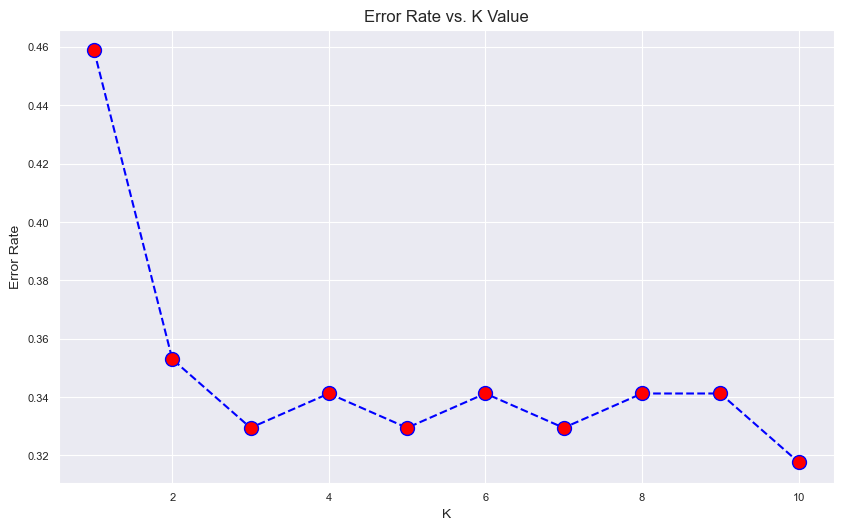

In [69]:
# Step:2 Plotting the error rate
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [70]:
# Step:3 Get nearst neighbors
knn1 = KNeighborsClassifier(n_neighbors=3)

# Step:4 Fitting the training data
knn1.fit(X_train,y_train)

# Step:5 Prediction on testing data
knn_test_predict = knn1.predict(X_test)

# Step:6 Prediction on training data
knn_train_predict = knn1.predict(X_train)

### EVALUATION

### TRAINING ACCURACY


In [71]:
knn_train_accuracy = accuracy_score(knn_train_predict,y_train)
print("Training accuracy of knn model ",knn_train_accuracy)
print("Training classification report:\n",classification_report(knn_train_predict,y_train))

Training accuracy of knn model  0.8154761904761905
Training classification report:
               precision    recall  f1-score   support

           0       0.91      0.85      0.88       266
           1       0.54      0.70      0.61        70

    accuracy                           0.82       336
   macro avg       0.73      0.77      0.75       336
weighted avg       0.84      0.82      0.82       336



### TESTING ACCURACY


In [72]:
knn_test_accuracy = accuracy_score(knn_test_predict,y_test)
print("Testing accuracy of knn model",knn_test_accuracy*100)
print("Testing classification report: \n",classification_report(knn_test_predict,y_test))


Testing accuracy of knn model 67.05882352941175
Testing classification report: 
               precision    recall  f1-score   support

           0       0.81      0.74      0.77        65
           1       0.35      0.45      0.39        20

    accuracy                           0.67        85
   macro avg       0.58      0.59      0.58        85
weighted avg       0.70      0.67      0.68        85



In [73]:
#Printingthe roc auc score
roc_auc_score(knn_test_predict,y_test)

0.5942307692307692

In [74]:
# Recall score
recall_knn = recall_score(knn_test_predict,y_test)
recall_knn*100

45.0

In [75]:
# Cross tab
pd.crosstab(knn_test_predict,y_test)

target_March2007Donation,0,1
row_0,,
0,48,17
1,11,9


## 4.RandomForestClassifier


In [76]:
# Step:1 importing libary and creating object
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100) # 100 decision tree

# Step:2 fitting training data
rf.fit(X_train,y_train)

# Step:3 Prediction on testing data
rf_test_predict = rf.predict(X_test)

# Step:4 Prediction on training data
rf_train_predict = rf.predict(X_train)

### EVALUATION

### TRAINING ACCURACY


In [77]:
rf_train_accuracy = accuracy_score(rf_train_predict,y_train)
print("Training accuracy of random forest",rf_train_accuracy)
print("Classification report of training: \n",classification_report(rf_train_predict,y_train))

Training accuracy of random forest 0.9583333333333334
Classification report of training: 
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       244
           1       0.93      0.91      0.92        92

    accuracy                           0.96       336
   macro avg       0.95      0.94      0.95       336
weighted avg       0.96      0.96      0.96       336



### TESTING ACCURACY


In [78]:
rf_test_accuracy = accuracy_score(rf_test_predict,y_test)
print("Testing accuracy of random forest",rf_test_accuracy*100)
print("Classification report of testing: \n",classification_report(rf_test_predict,y_test))

Testing accuracy of random forest 64.70588235294117
Classification report of testing: 
               precision    recall  f1-score   support

           0       0.80      0.72      0.76        65
           1       0.31      0.40      0.35        20

    accuracy                           0.65        85
   macro avg       0.55      0.56      0.55        85
weighted avg       0.68      0.65      0.66        85



In [79]:
#Printingthe roc auc score
roc_auc_score(rf_test_predict,y_test)

0.5615384615384614

In [80]:
# Cross tab
pd.crosstab(rf_test_predict,y_test)

target_March2007Donation,0,1
row_0,,
0,47,18
1,12,8


### HYPERPARAMETER TUNNING OF RANDOM FOREST


In [81]:
# Step:1 import library and imputation of parameter
from sklearn.model_selection import RandomizedSearchCV  
#In random forest we are not used grid search CV because of memory reason.

n_estimators = [int(x) for x in np.linspace(start=100 ,stop=2000, num=10)] #No of decision tree in forest
max_features = ['auto', 'sqrt'] #Max no of feature consider to create decision tree
max_depth    = [int(x) for x in np.linspace(10,100,num=11)] #Max no of level in each decision tree
max_depth.append(None)
min_samples_split = [2,3,5,10] #Min number of data points placed in a node before the node is split
min_samples_leaf  = [1,2,3,4,5]  #Min number of data point allowed in leaf node

# Step:2 Creating dictionary of paramter
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# Step:3 Object creation
rf_clf = RandomForestClassifier(random_state=42) #Provide random state because select rows and columns randomly

# Step:4 Create Random search CV with parameter
rf_cv = RandomizedSearchCV(estimator=rf_clf,scoring='f1',param_distributions=random_grid,
                           n_iter=20,cv=2,verbose=2,random_state=42,n_jobs=-1)

# Step:5 Fitting the training data
rf_cv.fit(X_train,y_train)

# Step:6 Get best parameter
rf_best_params = rf_cv.best_params_
print(f"Best parameter: {rf_best_params}")

Fitting 2 folds for each of 20 candidates, totalling 40 fits
Best parameter: {'n_estimators': 1366, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None}


In [82]:
# Step:7 Create object and place the best paramter
rf_clf1 = RandomForestClassifier(**rf_best_params)

# Step:8 Fitting the training data
rf_clf1.fit(X_train,y_train)

# Step:9 Prediction on test data
rf_clf1_predict = rf_clf1.predict(X_test)

### EVALUATION

In [83]:
rf_accuracy = accuracy_score(rf_clf1_predict,y_test)
print("Accuracy after hyperparameter tunning",rf_accuracy*100)
print("Classification report: \n",classification_report(rf_clf1_predict,y_test))

Accuracy after hyperparameter tunning 63.52941176470588
Classification report: 
               precision    recall  f1-score   support

           0       0.81      0.71      0.76        68
           1       0.23      0.35      0.28        17

    accuracy                           0.64        85
   macro avg       0.52      0.53      0.52        85
weighted avg       0.70      0.64      0.66        85



In [84]:
rf_recall_score = recall_score(rf_clf1_predict,y_test)
print("Recall score:",rf_recall_score*100)

Recall score: 35.294117647058826


## 5.XGBClassifier


In [85]:
# Step:1 import library and object creation
import xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier()

# Step:2 Fitting the training data
xgb.fit(X_train,y_train)

# Step:3 Prediction on training data
xgb_train_predict = xgb.predict(X_train)

# Step:4 Prediction on testing data
xgb_test_predict = xgb.predict(X_test)

### EVALUATION

### TRAINING ACCURACY


In [86]:
xgb_train_accuracy = accuracy_score(xgb_train_predict,y_train)
print("Training accuracy of xgb model",xgb_train_accuracy)
print("Classifiaction report on training: \n",classification_report(xgb_train_predict,y_train))

Training accuracy of xgb model 0.8571428571428571
Classifiaction report on training: 
               precision    recall  f1-score   support

           0       0.94      0.87      0.91       266
           1       0.62      0.80      0.70        70

    accuracy                           0.86       336
   macro avg       0.78      0.84      0.80       336
weighted avg       0.88      0.86      0.86       336



### TESTING ACCURACY


In [87]:
xgb_test_accuracy = accuracy_score(xgb_test_predict,y_test)
print("Testing accuracy of xgb model",xgb_test_accuracy*100)
print("Classification report on testing: \n",classification_report(xgb_test_predict,y_test))


Testing accuracy of xgb model 62.35294117647059
Classification report on testing: 
               precision    recall  f1-score   support

           0       0.78      0.71      0.74        65
           1       0.27      0.35      0.30        20

    accuracy                           0.62        85
   macro avg       0.52      0.53      0.52        85
weighted avg       0.66      0.62      0.64        85



In [88]:
#Printingthe roc auc score
roc_auc_score(xgb_test_predict,y_test)

0.5288461538461539

In [89]:
xgb_recall_score = recall_score(xgb_test_predict,y_test)
print("Recall score:",xgb_recall_score*100)

Recall score: 35.0


### HYPERPARAMETER TUNNING OF XG BOOST


In [90]:
# Step:1 import library 
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8],
              'learning_rate': [0.001,0.01,0.1, 0.03, 0.06, 0.1],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115],
              'reg_alpha': [0,0.01,0.1,0.02,0.2,0.4,],
              'reg_lambda': [0,0.01,0.1,0.02,0.2,0.4,0.8,1.6]}

# Step:2 Object creation with parameter
XGB = XGBClassifier(random_state=42)

# Step:3 Create randomized search cv with parameter
rcv = RandomizedSearchCV(estimator=XGB,scoring='f1',param_distributions=param_grid,n_iter=60,
                        cv=4,verbose=2,random_state=42,n_jobs=-1)

#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.

# Step:4 Fitting training data on randomized search cv
rcv.fit(X_train,y_train)

# Step:5 Get best parameters
rcv_best_parameter = rcv.best_params_
print(f"Best parameter: {rcv_best_parameter}")

Fitting 4 folds for each of 60 candidates, totalling 240 fits
Best parameter: {'reg_lambda': 0.1, 'reg_alpha': 0, 'n_estimators': 65, 'max_depth': 11, 'learning_rate': 0.01, 'gamma': 0}


In [91]:
# Step:6 Place the best parameter
XGB2 = XGBClassifier(reg_lambda=12.8,reg_alpha=0.4,n_estimators=115,max_depth=9,learning_rate=0.7,gamma=0.1)

# Step:7 Fitting the training data
XGB2.fit(X_train,y_train)

# Step:8 Prediction on testing data
XGB_prediction = XGB2.predict(X_test)

### EVALUATION


In [92]:
XGB_accuracy = accuracy_score(XGB_prediction,y_test)
print("Accuracy score after hyperparameter tunning",XGB_accuracy*100)
print("Classification report: \n",classification_report(XGB_prediction,y_test))

Accuracy score after hyperparameter tunning 65.88235294117646
Classification report: 
               precision    recall  f1-score   support

           0       0.83      0.72      0.77        68
           1       0.27      0.41      0.33        17

    accuracy                           0.66        85
   macro avg       0.55      0.57      0.55        85
weighted avg       0.72      0.66      0.68        85



In [93]:
XGB_recall = recall_score(XGB_prediction,y_test)
print("Recall Score",XGB_recall*100)

Recall Score 41.17647058823529


## 6. Decision Tree Classifier :-

In [94]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_features = None,
                            max_depth = 45,
                            min_samples_split = 3,
                            min_samples_leaf = 30,
                            random_state=42)

model = dt.fit(X_train, y_train)


#Predictions - Decision Tree

model.predict(X_test)

print("Decision Tree")
print("Training Score: {}".format(dt.score(X_train, y_train)))
print("Test Score: {}".format(dt.score(X_test, y_test)))
print("----------------------------------------")



Decision Tree
Training Score: 0.7559523809523809
Test Score: 0.7529411764705882
----------------------------------------


## Conclusion

**I have tried LogisticRegression,Support Vector Machine, Decision Tree , Random forest, KNN, XGBClassifie.The LogisticRegression and Decision Tree gives best accuracy with respect to 71.85 and 75.62 score. But the LogisticRegression gives best AUC_ROC score 85.11 score .We have compared the performance of various binary classification algorithms.Fit the data with AUC_ROC accuracy 85% with the LogisticRegression Classifier.Hence LogisticRegression gives balanced accuracy in every meassures and is considered as the best model with respect to our business case**